# Introduction to Data Wrangling and Explanatory Data Analysis (EDA)

This original tutorial is written by Yiqiu Shen (yiqiushe@usc.edu) for the USC JumpStart Summer Program 2023 at the Department of Data Sciences and Operations, Marshall School of Business. Should you have any questions, feel free to contact me.  

## Data Wrangling

The datasets we will use are: https://www.kaggle.com/datasets/rojour/boston-results.  These are lists of the finishers of the Boston Marathon of 2015, 2016 and 2017 respectively, and contain the name, age, gender, country, city and state (where available), times at 9 different stages of the race, expected time, finish time and pace, overall place, gender place and division place.

### Load the datasets, aggregate the datasets

In [335]:
import pandas as pd
import numpy as np

data_2015 = pd.read_csv("./marathon_results_2015.csv")
data_2016 = pd.read_csv("./marathon_results_2016.csv")
data_2017 = pd.read_csv("./marathon_results_2017.csv")

# Add a new column 'Year' with the corresponding year for each dataframe
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017

# Concatenate the three dataframes into a single dataframe 'df'
df = pd.concat([data_2015, data_2016, data_2017], ignore_index=True)


### Inspect the dataset

First, let us inspect some entries from the dataframe to get a rough impression. We can start with the first entries: 

In [336]:
df.head()


,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015,NaN
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015,NaN
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015,NaN
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015,NaN
4,4.0,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015,NaN


Or the last entries: 

In [337]:
df.tail()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
79633,26405.0,25166,"Steinbach, Paula Eyvonne",61,F,Ontario,CA,USA,NaN,MI,...,5:55:18,6:46:57,0:16:24,-,7:09:39,26407,11972,344,2017,NaN
79634,26406.0,25178,"Avelino, Andrew R.",25,M,Fayetteville,NC,USA,NaN,MI,...,5:53:48,6:54:21,0:16:40,-,7:16:59,26408,14436,4774,2017,NaN
79635,26407.0,27086,"Hantel, Johanna",57,F,Malvern,PA,USA,NaN,NaN,...,6:00:33,6:54:38,0:16:47,-,7:19:37,26409,11973,698,2017,NaN
79636,26408.0,25268,"Reilly, Bill",64,M,New York,NY,USA,NaN,MI,...,6:06:07,6:56:08,0:16:49,-,7:20:44,26410,14437,1043,2017,NaN
79637,26409.0,25266,"Rigsby, Scott",48,M,Alpharetta,GA,USA,NaN,MI,...,6:39:07,7:41:23,0:18:15,-,7:58:14,26411,14438,2553,2017,NaN


Or even some random entries:

In [338]:
df.sample(10)
# Default sample is executed without replacement. If you want to sample with replacement, use
# df.sample(replace=True)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
4115,4115.0,6534,"Boulanger, Simon Sr.",35,M,Terrebonne,QC,CAN,NaN,NaN,...,2:32:40,2:56:55,0:07:10,-,3:07:34,4116,3801,2578,2015,NaN
54244,1016.0,650,"Zhang, Yu",33,M,Sunnyvale,CA,USA,CHN,NaN,...,2:23:37,2:46:11,0:06:44,-,2:56:19,1017,960,750,2017,NaN
25369,25369.0,30261,"Clifford, Kaitlyn A.",32,F,South Boston,MA,USA,NaN,NaN,...,4:14:29,4:55:07,0:11:54,-,5:11:38,25370,11326,5635,2015,NaN
3219,3219.0,4077,"West, John",53,M,Alameda,CA,USA,NaN,NaN,...,2:30:11,2:52:37,0:06:59,-,3:02:57,3220,3025,109,2015,NaN
38552,NaN,20486,"Handyside, Leslie",41,F,Northville,MI,USA,NaN,NaN,...,3:05:48,3:32:36,0:08:32,3:43:38,3:43:38,11954,3778,626,2016,NaN
1108,1108.0,1142,"Cherewatti, Jack",28,M,Somerville,MA,USA,NaN,NaN,...,2:21:49,2:42:33,0:06:33,-,2:51:39,1109,1063,887,2015,NaN
19894,19894.0,31555,"Bhathal, Alexander S.",39,M,Laguna Beach,CA,USA,NaN,NaN,...,3:21:20,3:52:43,0:09:24,-,4:06:02,19895,11704,4188,2015,NaN
75851,22623.0,13796,"Burwell, Julie A",36,F,East Peoria,IL,USA,NaN,NaN,...,3:51:57,4:28:56,0:10:52,-,4:44:42,22625,9874,4872,2017,NaN
69216,15988.0,19251,"Taylor, Andrea C.",43,F,Oakville,ON,CAN,NaN,NaN,...,3:19:14,3:48:42,0:09:14,-,4:01:43,15990,6099,1066,2017,NaN
76169,22941.0,20848,"Rigitano, Vincenzo",63,M,Stoney Creek,ON,CAN,NaN,NaN,...,3:50:32,4:30:47,0:10:59,-,4:47:50,22943,12894,863,2017,NaN


Check the number of rows, columns:

In [339]:
df.shape

(79638, 27)

Check type of each column:


In [340]:
df.dtypes



Unnamed: 0       float64
Bib               object
Name              object
Age                int64
M/F               object
City              object
State             object
Country           object
Citizen           object
Unnamed: 9        object
5K                object
10K               object
15K               object
20K               object
Half              object
25K               object
30K               object
35K               object
40K               object
Pace              object
Proj Time         object
Official Time     object
Overall            int64
Gender             int64
Division           int64
Year               int64
Unnamed: 8        object
dtype: object

We can see that all columns relating to time are not of type numeric, which needs further processing.

But let us finish inspecting first. Let's check if there are duplicates.

In [341]:
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  0


Since there are no duplicates, we will randomly duplicate 10 rows and add them to the end of the original data frame for demonstration purpose. 


In [342]:
df = pd.concat([df, df.sample(n=10)])
print('Number of duplicate rows after tampering: ', df.duplicated().sum())

Number of duplicate rows after tampering:  10


Then we can remove the duplicating rows: 

In [343]:
df.drop_duplicates(inplace=True)


`df=df.drop_duplicates()` also works to remove the duplicating rows. 

Note: If we want to modify a dataframe without creating a new one, most dataframe operations support inplace argument. If we simply use `df.drop_duplicates()`, this will create a new copy of modified dataFrame. 



### Transforming Data

Previously, we mentioned that the format of time is not desirable. We want to change its type from object to numeric. One way to do is to convert to seconds using `pd.to_timedelta()` method. Let's take the 5K column as an example. 

In [344]:
temp_5k_in_seconds = pd.to_timedelta(df['5K'], errors='coerce').dt.total_seconds()

# check if there is any failure 
temp_5k_in_seconds.isna().sum()

229

We can see there are some conversion failures and we want to know why. Below locates the NaNs and checks the original values. We want to make sure that we do not lose any info.


In [345]:
print(df['5K'][np.where(pd.isna(temp_5k_in_seconds))[0]])

# Another way to debug: 
# for i, str in enumerate(df['5K'].to_list()):
#     try:
#         pd.to_timedelta(str)
#     except:
#         print(i)
#         print(str)
#         break

2327     -
3384     -
3860     -
7747     -
8897     -
        ..
76395    -
76478    -
77631    -
78322    -
79349    -
Name: 5K, Length: 229, dtype: object


Now we convert all time related columns: 


In [346]:
columns = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time']

for column in columns:
    df[column] = pd.to_timedelta(df[column], errors='coerce').dt.total_seconds()


In [347]:
df.dtypes

Unnamed: 0       float64
Bib               object
Name              object
Age                int64
M/F               object
City              object
State             object
Country           object
Citizen           object
Unnamed: 9        object
5K               float64
10K              float64
15K              float64
20K              float64
Half             float64
25K              float64
30K              float64
35K              float64
40K              float64
Pace             float64
Proj Time        float64
Official Time    float64
Overall            int64
Gender             int64
Division           int64
Year               int64
Unnamed: 8        object
dtype: object

### Handle Missing Values

Now we are ready to handle missing values. First, we check if each column in this df has missing values.

In [348]:
print(df.isnull().sum())

Unnamed: 0       26630
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 1
State             8993
Country              0
Citizen          76198
Unnamed: 9       79480
5K                 229
10K                114
15K                 51
20K                 85
Half                62
25K                 81
30K                 88
35K                 86
40K                 76
Pace                 0
Proj Time        53117
Official Time        0
Overall              0
Gender               0
Division             0
Year                 0
Unnamed: 8       79555
dtype: int64


Before we do anything to the dataframe, we want to know why there are missing values. It is a good time to check the documentation page and the data source. 

From there, we know that State is only filled by USA runners and Citizen is an optional field that most runners chose not to fill when they registered. For the time related columns, missing values may occur becuase a runner's time is not recorded properly at a specific checkpoint. 

The columns *Unnamed: 9* and *Unnamed: 8* seems to be human error when the data is scraped. Let's not concern about them right now. 

**Drop the missing values** 

If, however, you do not have a reason to figure out why there are missing values (which rarely happens), you can drop rows with NA's:

In [349]:
temp_na_rows_dropped = df.dropna()
print(temp_na_rows_dropped.isnull().sum())

temp_na_rows_dropped.shape


Unnamed: 0       0.0
Bib              0.0
Name             0.0
Age              0.0
M/F              0.0
City             0.0
State            0.0
Country          0.0
Citizen          0.0
Unnamed: 9       0.0
5K               0.0
10K              0.0
15K              0.0
20K              0.0
Half             0.0
25K              0.0
30K              0.0
35K              0.0
40K              0.0
Pace             0.0
Proj Time        0.0
Official Time    0.0
Overall          0.0
Gender           0.0
Division         0.0
Year             0.0
Unnamed: 8       0.0
dtype: float64


(0, 27)

It looks like we removed all the data, because each row has at least one missing value. To validate our statement, we can perform the below operation: 


In [350]:
print(df.isnull().any(axis=1).sum())
df.shape


79638


(79638, 27)

The number of rows that has missing values is equal to the number of rows in this dataframe. How about dropping columns with missing values?


In [351]:
temp_na_columns_dropped = df.dropna(axis=1)
print(temp_na_columns_dropped.isnull().sum())

temp_na_columns_dropped.shape

Bib              0
Name             0
Age              0
M/F              0
Country          0
Pace             0
Official Time    0
Overall          0
Gender           0
Division         0
Year             0
dtype: int64


(79638, 11)

We dropped all of the "splits" time, which is not ideal for detailed analysis. 

**Fill the missing values** 

Alternatively, we can also fill na's with appropriate values. In this case, we can fill the missing values with empty strings and 0's, depending on column type. 

In [352]:
temp_filled = df.copy()
for col in temp_filled.columns:
    if df[col].dtype == 'object':
        temp_filled[col].fillna('', inplace=True)
    else:
        temp_filled[col].fillna(0, inplace=True)

temp_filled.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
0,0.0,3,"Desisa, Lelisa",25,M,Ambo,,ETH,,,...,6479.0,7359.0,296.0,0.0,7757.0,1,1,1,2015,
1,1.0,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,,ETH,,,...,6479.0,7362.0,298.0,0.0,7788.0,2,2,2,2015,
2,2.0,8,"Chebet, Wilson",29,M,Marakwet,,KEN,,,...,6479.0,7381.0,299.0,0.0,7822.0,3,3,3,2015,
3,3.0,11,"Kipyego, Bernard",28,M,Eldoret,,KEN,,,...,6483.0,7427.0,300.0,0.0,7847.0,4,4,4,2015,
4,4.0,10,"Korir, Wesley",32,M,Kitale,,KEN,,,...,6479.0,7407.0,300.0,0.0,7849.0,5,5,5,2015,


**Impute the missing values**

The split times of some runners are not recorded properly and are set to NaN when we tried to convert time to seconds. In this case, one way to impute these NaN's is to take the portion of official time accordingly. 

In [353]:
columns = [[5, '5K'], [10, '10K'], [15, '15K'], [20, '20K'], [42.195/2, 'Half'], [25, '25K'], [30, '30K'], [35, '35K'], [40, '40K']]

df_imputed = df.copy()

for [miles, column] in columns:
    df_imputed.loc[df[column].isna(), column] = df['Official Time'][df[column].isna()] * (miles / 42.195)



In [354]:
df_imputed.isnull().sum()

Unnamed: 0       26630
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 1
State             8993
Country              0
Citizen          76198
Unnamed: 9       79480
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time        53117
Official Time        0
Overall              0
Gender               0
Division             0
Year                 0
Unnamed: 8       79555
dtype: int64


Note that any method dealing with missing values adds additional bias to our data. Choose them wisely!

## Explanatory Data Analysis (EDA)

### What are the differences?

Data wrangling and exploratory data analysis (EDA) are two important steps in the data analysis process. While they are related, they serve distinct purposes. 

**Data wrangling** focuses on cleaning, transforming, and preparing raw data for analysis. It ensures data quality and prepares it for further processing. Techniques include cleaning, preprocessing, and aggregation.

**Exploratory Data Analysis (EDA)** involves analyzing and visualizing data to gain insights, identify patterns, and understand its structure. It explores relationships between variables, detects outliers, and generates hypotheses.

Data wrangling sets the foundation for EDA by ensuring data quality and structure, while EDA helps in understanding the data and generating hypotheses for further analysis. Both steps are crucial in the data analysis process and often go hand in hand. 


### Data Exploration
First, we deplay summary statistics for numeric columns. 

In [355]:
print("Summary statistics:\n", df.describe())


Summary statistics:
          Unnamed: 0           Age            5K           10K           15K  \
count  53008.000000  79638.000000  79409.000000  79524.000000  79587.000000   
mean   13251.666692     42.415166   1527.392361   3056.006124   4610.047307   
std     7651.406646     11.355453    238.229185    479.974721    736.051219   
min        0.000000     18.000000    883.000000   1783.000000   2697.000000   
25%     6625.750000     34.000000   1355.000000   2711.000000   4085.000000   
50%    13251.500000     42.000000   1497.000000   2992.000000   4508.000000   
75%    19877.250000     50.000000   1654.000000   3312.000000   4997.000000   
max    26597.000000     84.000000   3350.000000   6436.000000   9705.000000   

                20K         Half           25K           30K           35K  \
count  79553.000000  79576.00000  79557.000000  79550.000000  79552.000000   
mean    6213.512727   6559.22601   7857.497744   9595.217197  11409.743715   
std     1019.400499   1077.86020 

Some example questions to ask:

- How many runners participated 3 years in a row? What are their names? (For simplicity, we do not consider people with the same names)

In [356]:
# Create separate sets of names for each year
names_2015 = set(df[df['Year'] == 2015]['Name'])
names_2016 = set(df[df['Year'] == 2016]['Name'])
names_2017 = set(df[df['Year'] == 2017]['Name'])

# Find the intersection of the three sets
common_names = names_2015.intersection(names_2016, names_2017)

# Length of common_names
common_names_length = len(common_names)

# Print the length
print("Number of runners who participated 3 years in a row:", common_names_length)

# Print the common names
for name in common_names:
    print(name)



Number of runners who participated 3 years in a row: 2318
Ultsch, Janette
Verderame, Jyoti
Cheng, Francis
Cronin, Brian S.
Bowman, Stacey
Yu, Alex
Clayton, Jennifer K
Weibeler, Mickey
Krzynowek, Lauren K.
Bellerive, Robert
Hoffman, Bill
Jacobs, Rubesh
Rich, George F
Pilotte, Micho
Schreiber, Maria E.
Tocha, Wendy
Lewullis, Kimberly J
Levy, Wayne A.
Brazeau, Gerald
Mrowka, Marcin
Di Iulio, Tara F
Drzewiecki, Alexis
She, Chunfeng
Couture, Nathaniel
Alzate, Alejandro
Gronquist, James M
Solomon, Jennifer J.
Dedeo, Carrie-Anne
Mundhenke, Gary L
Johnson, Derek M
Jones, Jessica L
Hetherington, Alexander G
Quandt, Julie M
Nanfelt, Scott B.
Garcia, Tony T
Jensen, Jan
Gill, Catherine W
Crumpler, Katrina
Hetzer, Nicole K
Benson, Cory R
Meixelsperger, David
Mandak, Greg
Minella, Paula J.
Lipcon, Meghan
Sheridan, Jennifer F.
Stoops, Jody
Moore, Jared
Cashen, Dennis
Panzek, Steven
Lederer, Peter
Kaye, Celeste A.
Stanley, Michael John
Kuzma, Cindy
Cass, Laurie
Dumont, Bill
Byers, Christine
Forestell,

- Who are the winners of each year?

In [357]:
winners = []
for year in df['Year'].unique():
    winner = df.loc[(df['Year'] == year) & (df['Overall'] == 1), 'Name'].values[0]
    winners.append(winner)

# Print winners and years side by side
for i in range(len(winners)):
    print(f"{winners[i]} - {df['Year'].unique()[i]}")

Desisa, Lelisa - 2015
Hayle, Lemi Berhanu - 2016
Kirui, Geoffrey - 2017


- Who is the oldest runner of each gender, out of these three years?

In [358]:
# Group the data by gender
grouped_data = df.groupby('M/F')

# Loop through each group
for gender, group in grouped_data:
    # Find the row with the largest age in the group
    max_age_row = group[group['Age'] == group['Age'].max()]
    # Print the name with the largest age in the group
    print("Gender:", gender)
    print("Name with the largest age:", max_age_row['Name'].values[0])
    print("Age:", max_age_row['Age'].values[0])
    print("--------------------")



Gender: F
Name with the largest age: Beiers, Katherine
Age: 84
--------------------
Gender: M
Name with the largest age: Wilson, Harold
Age: 83
--------------------


### Data Engineering

We can create some new features based on our data. One feature we can add is the division name.



In [377]:
age_group_mapping = {
    'M18-39': ['M', 18, 39],
    'M40-44': ['M', 40, 44],
    'M45-49': ['M', 45, 49],
    'M50-54': ['M', 50, 54],
    'M55-59': ['M', 55, 59],
    'M60-64': ['M', 60, 64],
    'M65-69': ['M', 65, 69],
    'M70-74': ['M', 70, 74],
    'M75-79': ['M', 75, 79],
    'M80+': ['M', 80, float('inf')],
    'F18-39': ['F', 18, 39],
    'F40-44': ['F', 40, 44],
    'F45-49': ['F', 45, 49],
    'F50-54': ['F', 50, 54],
    'F55-59': ['F', 55, 59],
    'F60-64': ['F', 60, 64],
    'F65-69': ['F', 65, 69],
    'F70-74': ['F', 70, 74],
    'F75-79': ['F', 75, 79],
    'F80+': ['F', 80, float('inf')]
}


# Create an empty column for Age/Gender group
df['Division Name'] = ''

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    gender = row['M/F']
    age = row['Age']
    
    # Find the matching age group in the mapping
    for key, value in age_group_mapping.items():
        if value[0] == gender and value[1] <= age <= value[2]:
            df.at[index, 'Division Name'] = key
            break


Note: Similar to `loc`, in that both provide label-based lookups. Use at if you only need to get or set a single value in a DataFrame or Series. 

Food of thought: why are we not simply using brackets? 
Hint: https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-basics-get-value

### Data Visualization

#### Histogram: Age distributions

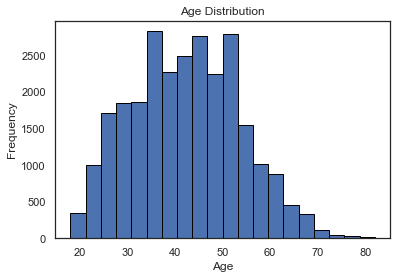

In [363]:
import matplotlib.pyplot as plt

# Create a histogram of age distribution
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


#### Scatter Plot with Trend Line: Finish Time vs Age

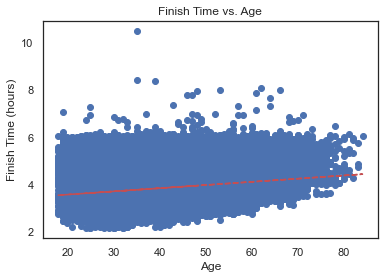

In [370]:

import numpy as np
import matplotlib.pyplot as plt

# Create a scatter plot of finish time vs. age
plt.scatter(df['Age'], df['Official Time'] / 3600)
plt.xlabel('Age')
plt.ylabel('Finish Time (hours)')
plt.title('Finish Time vs. Age')

# Add trend line
z = np.polyfit(df['Age'], df['Official Time'] / 3600, 1)
p = np.poly1d(z)
plt.plot(df['Age'], p(df['Age']), "r--")

plt.show()



#### Box Plot: Division Vs Finish Time

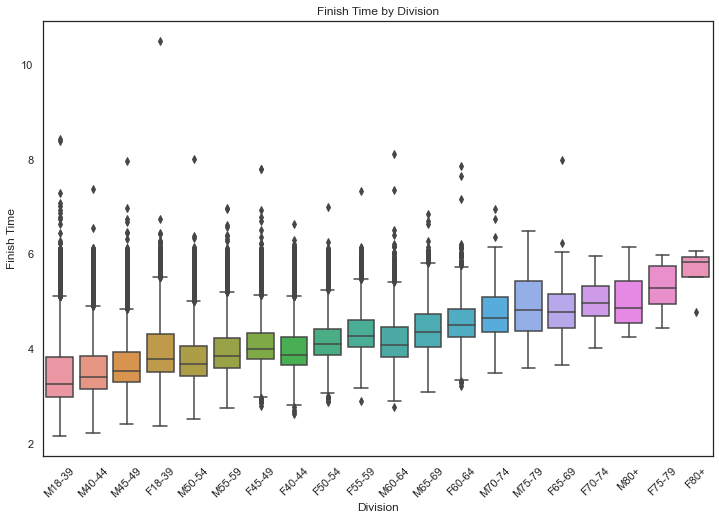

In [380]:
import seaborn as sns

# Create a box plot of finish time by gender
df['Official Time (Hr)']=df['Official Time']/3600
sns.boxplot(x='Division Name', y='Official Time (Hr)', data=df)
plt.xlabel('Division')
plt.ylabel('Finish Time')
plt.title('Finish Time by Division')
plt.rcParams['figure.figsize'] = [12, 8]
plt.xticks(rotation=45)
plt.show()





#### Line chart: Does Top Runners stays top for the whole race?

For the fastest 10 runners in 2015, create a line chart based on their splits. 

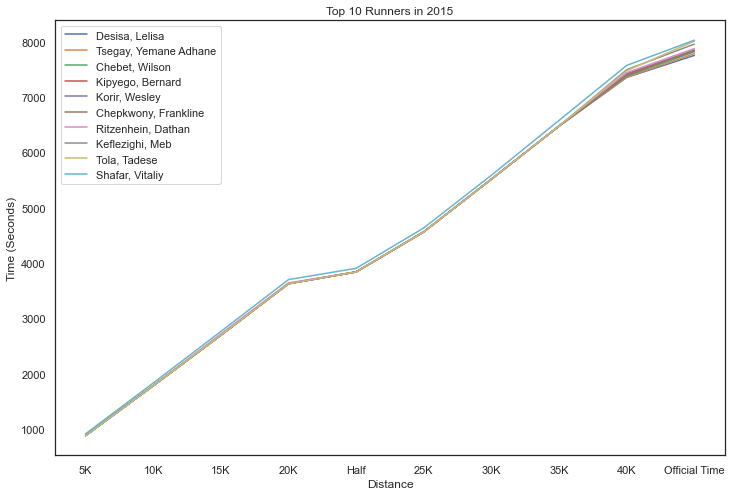

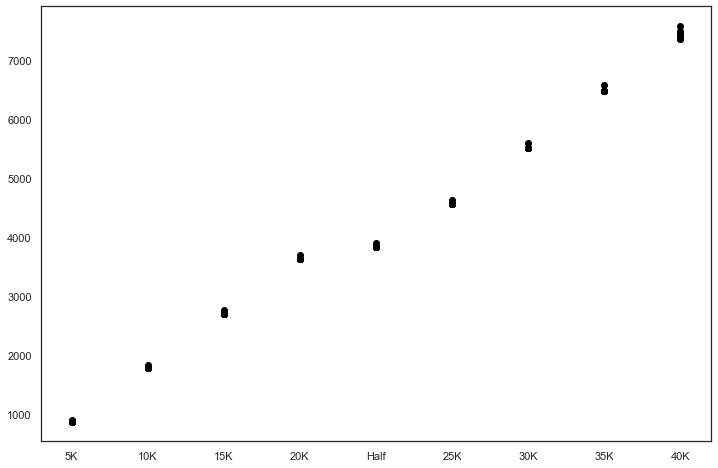

In [390]:

df_2015 = df[df['Year'] == 2015].sort_values('Official Time')

# Select the top 10 runners
top_10 = df_2015.head(10)

for index, row in top_10.iterrows():
    plt.plot(row[['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Official Time']], label=row['Name'])

plt.xlabel('Distance')
plt.ylabel('Time (Seconds)')
plt.title('Top 10 Runners in 2015')
plt.legend()
plt.show()

References: 

[1] [https://online.hbs.edu/blog/post/data-wrangling](https://online.hbs.edu/blog/post/data-wrangling)

[2] [https://www.tomasbeuzen.com/python-programming-for-data-science/](https://www.tomasbeuzen.com/python-programming-for-data-science/)

[3] [https://www.kaggle.com/learn/data-cleaning](https://www.kaggle.com/learn/data-cleaning)

[4] [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html)